<a href="https://colab.research.google.com/github/rushi2012/Stock_Price_Prediction/blob/main/Stock_Price_Prediction_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

In [33]:
# Import and read CSV file
stock = pd.read_csv('/content/AAPL_Price_History_20211207.csv')
stock.head()

,Date,Open,High,Low,Close,Volume,Unnamed: 6
0,12/7/2011,13.9261,13.9621,13.8129,13.8961,305000048.0,NaN
1,12/8/2011,13.9803,14.1250,13.9368,13.9521,376356580.0,NaN
2,12/9/2011,14.0303,14.0728,13.9653,14.0578,297143408.0,NaN
3,12/12/2011,13.9886,14.0678,13.9089,13.9943,301065820.0,NaN
4,12/13/2011,14.0357,14.1214,13.8250,13.8861,339137092.0,NaN


In [34]:
stock = stock.iloc[:,:-1]

In [35]:
stock = stock.dropna()

In [36]:
stock.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [37]:
stock.tail()

,Date,Open,High,Low,Close,Volume
2512,12/1/2021,167.480,170.3000,164.53,164.77,152423003.0
2513,12/2/2021,158.735,164.2000,157.80,163.76,136739174.0
2514,12/3/2021,164.020,164.9600,159.72,161.84,118023116.0
2515,12/6/2021,164.290,167.8799,164.28,165.32,107496982.0
2516,12/7/2021,169.080,171.5800,168.34,171.18,120405352.0


In [38]:
stock.shape

(2517, 6)

In [39]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2517 non-null   object 
 1   Open    2517 non-null   float64
 2   High    2517 non-null   float64
 3   Low     2517 non-null   float64
 4   Close   2517 non-null   float64
 5   Volume  2517 non-null   float64
dtypes: float64(5), object(1)
memory usage: 137.6+ KB


In [40]:
miss_val = stock.isna().sum()
miss_val

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [41]:
# Drop negatively correlated columns
from datetime import datetime
stock.Date=pd.to_datetime(stock.Date )
stock.info()
stock['Month']=pd.DatetimeIndex(stock['Date']).month
stock['Year']=pd.DatetimeIndex(stock['Date']).year
stock['day']=pd.DatetimeIndex(stock['Date']).day
stock.drop(['Date'],axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   Open    2517 non-null   float64       
 2   High    2517 non-null   float64       
 3   Low     2517 non-null   float64       
 4   Close   2517 non-null   float64       
 5   Volume  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 137.6 KB


In [42]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2516
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2517 non-null   float64
 1   High    2517 non-null   float64
 2   Low     2517 non-null   float64
 3   Close   2517 non-null   float64
 4   Volume  2517 non-null   float64
 5   Month   2517 non-null   int64  
 6   Year    2517 non-null   int64  
 7   day     2517 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 177.0 KB


In [43]:
corr = stock.corr()
corr

,Open,High,Low,Close,Volume,Month,Year,day
Open,1.000000,0.999882,0.999840,0.999721,-0.419466,0.094243,0.830106,-0.003731
High,0.999882,1.000000,0.999801,0.999857,-0.417482,0.093771,0.830327,-0.003734
Low,0.999840,0.999801,1.000000,0.999858,-0.422621,0.094606,0.830484,-0.003407
Close,0.999721,0.999857,0.999858,1.000000,-0.420279,0.094169,0.830459,-0.003879
Volume,-0.419466,-0.417482,-0.422621,-0.420279,1.000000,-0.098943,-0.652390,0.021088
Month,0.094243,0.093771,0.094606,0.094169,-0.098943,1.000000,-0.034825,-0.003209
Year,0.830106,0.830327,0.830484,0.830459,-0.652390,-0.034825,1.000000,-0.008218
day,-0.003731,-0.003734,-0.003407,-0.003879,0.021088,-0.003209,-0.008218,1.000000


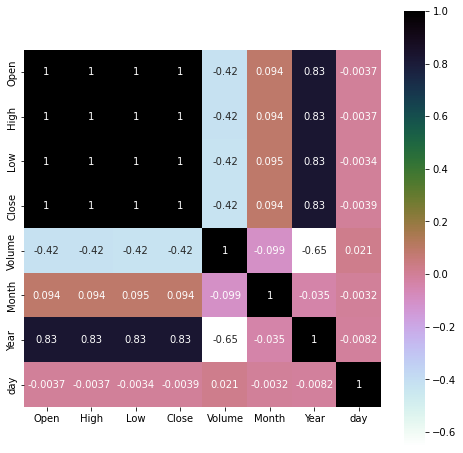

In [44]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [45]:
stock.shape

(2517, 8)

In [46]:
X = stock.drop(['Close'], axis=1)
y = stock['Close']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state =40)

In [48]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X. fit_transform(X_train)
#X_test = sc_X. fit_transform(X_test)

In [49]:
print('Dimension of Stock dataframe:',X_train.shape)
print('Dimension of Stock dataframe:',y_train.shape)
print('Dimension of val_x dataframe:',X_test.shape)
print('Dimension of val_y dataframe:',y_test.shape)

Dimension of Stock dataframe: (1887, 7)
Dimension of Stock dataframe: (1887,)
Dimension of val_x dataframe: (630, 7)
Dimension of val_y dataframe: (630,)


In [50]:
from sklearn.linear_model import LinearRegression
ln_reg= LinearRegression()
ln_reg = ln_reg.fit(X_train, y_train)

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df_pred = ln_reg.predict(X_test)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, y_test))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, y_test))
print('R_Squared Score of linear regression:', r2_score(y_test, df_pred))

Mean Absolute Error of linear regression: 0.21501990971003504
Mean Square Error of linear regression: 0.18492533098191205
R_Squared Score of linear regression: 0.9998596416759546


In [52]:
# prediction
y_pred = ln_reg.predict(X_test)
pred_stock = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_stock.head()


,Actual,Predicted
1275,29.0375,28.874869
1517,44.1050,44.180849
2169,92.8450,93.175502
1133,24.7075,24.798765
294,17.1403,17.175019


In [53]:
Acc = []

In [54]:
from sklearn.metrics import r2_score
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))
Acc.append(r2_score(y_test, y_pred))


Accuracy score of the predictions: 0.9998596416759546


In [65]:
#plt.figure(figsize=(8,8))
#plt.ylabel('Close', fontsize=8)
#plt.plot(pred_stock)
#plt.plot(['y_test', 'df_pred'])
#plt.show()


In [56]:
from sklearn.ensemble import RandomForestRegressor
rfrg = RandomForestRegressor(n_estimators= 100)
rfrg

RandomForestRegressor()

In [57]:
rfrg.fit(X_train, y_train)
rfrg.predict(X_test)

array([ 28.8771  ,  44.02555 ,  94.538   ,  24.76108 ,  17.242788,
        19.094773,  15.869563,  27.406525,  22.693874,  14.03678 ,
       142.8049  ,  18.8022  ,  20.914437,  33.910757,  28.16455 ,
        29.028125,  32.39819 ,  34.839175,  25.929625, 135.8526  ,
        33.422683,  23.526976,  38.49405 ,  15.441208,  23.533461,
        17.606991,  25.100781,  55.07225 ,  28.393109,  39.1484  ,
       145.8308  ,  42.3815  ,  15.140302,  35.997925,  29.2234  ,
        16.216981,  59.3985  ,  43.143   , 145.9805  ,  28.1059  ,
        46.732375,  18.37575 ,  48.67115 ,  54.941575,  24.238299,
        48.626625,  27.847675, 136.9261  ,  28.606975,  59.677875,
        17.863805,  39.922025,  25.7688  , 132.630975,  64.14895 ,
        48.708625,  27.365775,  37.5256  ,  30.112525,  80.661625,
        14.015624, 115.144675, 126.79375 ,  23.459966,  18.557534,
        31.150936,  24.928709,  30.6837  ,  40.379425, 129.707875,
        54.80825 , 115.4944  ,  44.469275,  22.646527,  43.743

In [58]:
from sklearn.model_selection import cross_val_score

Stock_forest_score = cross_val_score(rfrg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-Stock_forest_score)
(forest_rmse_scores)

array([0.54496094, 0.56622089, 0.43892436, 0.68893282, 0.71588616,
       0.53255073, 0.57008698, 0.45827283, 0.66977916, 0.71990954])

In [59]:
Stock_pred = rfrg.predict(X_train)
forest_mse = mean_squared_error(y_train, Stock_pred) 
forest_rmse = np.sqrt(forest_mse) 
forest_rmse


0.22816917293965622

In [60]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
xgb_model = XGBRegressor()

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear','reg:squarederror'],
              'learning_rate': [.02,.03, 0.05, .07, .1,.2,.3,.4,.5], #so called `eta` value
              'max_depth': [2,3, 5, 6, 7],
              'min_child_weight': [1,2,3,4,5,6],
              'silent': [1],
              'subsample': [0.7,.1,.2,.3,.6,.7],
              'colsample_bytree': [0.7,.1,.2,.3],
              'n_estimators': [10,20,30,40,50,60,70,80,90,100]}

search = RandomizedSearchCV(xgb_model, param_distributions=parameters, random_state=42,n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3, estimator=XGBRegressor(), n_iter=200, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.7, 0.1, 0.2,
                                                             0.3],
                                        'learning_rate': [0.02, 0.03, 0.05,
                                                          0.07, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'max_depth': [2, 3, 5, 6, 7],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100],
                                        'nthread': [4],
                                        'objective': ['reg:linear',
                                                      'reg:squarederror'],
                                        'silent': [1],


In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
scaler = MinMaxScaler()
model = RandomForestRegressor(n_estimators=40)
imputer = KNNImputer()
pipe = make_pipeline(imputer,scaler, model)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print("VAL SCORE:",pipe.score(X_test, y_test))
print("Training SCORE:",pipe.score(X_train, y_train))
print("MSE : % f" %mean_squared_error(y_test, pred))
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE : % f" %(rmse))
print('R_Squared Score of logistic regression:', r2_score(y_test, pred))

VAL SCORE: 0.9997414823943342
Training SCORE: 0.9999624185851664
MSE :  0.340603
RMSE :  0.583612
R_Squared Score of logistic regression: 0.9997414823943342
